Trong bài toán này, chúng ta sẽ được cho một bộ dataset mô tả thông tin về các batch của 1 loại rượu đỏ ở Bồ Đào Nha, bao gồm các features liên quan đến tính chất của rượu như: nồng độ acid, độ đường, độ pH,... Nhiệm vụ của chúng ta là phân tích, xử lí bộ data dưới đây và trả lời các câu hỏi yêu cầu người làm phải thực hiện coding. Đây là một bài toán phân loại với 11 features đầu vào và 1 feature đầu ra là chất lượng của rượu (từ 0 đến 10).
[winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

<!-- Tham khảo Link code gốc: [Ada+Gradient](https://drive.google.com/file/d/1wylU7Kro6P5zj1N41zyfLMSWU1qpkrkF/view?usp=sharing) -->

# **Thực hiện các yêu cầu sau đây**

1. **Đọc dữ liệu**
- Sử dụng pandas, đọc file csv được cung cấp, sau đó hiển thị ra màn hỉnh để hiểu các trường dữ liệu.

2. **Tách dữ liệu thành bộ feature (X) và label (y)**
- Sử dụng các cột "fixed acidity", "volatile acidity", "citric acid",... làm features đầu vào (`X`).
- Sử dụng cột "quality" làm biến đầu ra (`y`).

3. **Tách tập dữ liệu thành tập train và test**  
- Chia dữ liệu thành tập huấn luyện (`X_train`, `y_train`) và tập kiểm tra (`X_test`, `y_test`) với tỷ lệ `80:20`.
- Đảm bảo rằng việc chia tách dữ liệu là ngẫu nhiên nhưng tái lập (reproducibility) được với `random_state=42`

**Lưu ý:** Sử dụng các mô hình regressor trong sklearn để thực hiện đề bài này.

# Thư viện

In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Tải và đọc dữ liệu

In [2]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
    sep=';'
)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


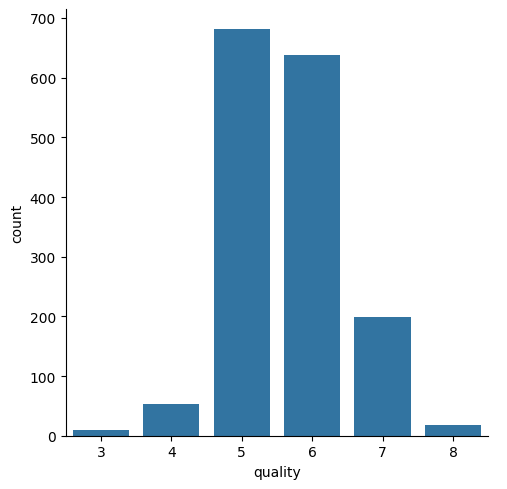

In [5]:
# creating a visualization  for quality
sns.catplot(x='quality', data=df, kind='count')

# Tiền xử lý

In [ ]:
features = df.drop('quality', axis=1)
labels = df['quality']
# Chia tập dữ liệu thành tập train và test với tỉ lệ (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

In [16]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [17]:
y_train.head()

493    6
354    6
342    6
834    5
705    5
Name: quality, dtype: int64

# Huấn luyện mô hình AdaBoost

In [18]:
# TODO: Khai báo mô hình AdaBoostRegressor với tham số `n_estimators=50, random_state=42`
ada_regressor = AdaBoostRegressor(n_estimators=50, random_state=42)

# Huấn luyện mô hình bằng hàm `fit`
ada_regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

## Check important feature

In [19]:
importances = ada_regressor.feature_importances_

In [23]:
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                 Feature  Importance
10               alcohol    0.235445
9              sulphates    0.191498
1       volatile acidity    0.148008
4              chlorides    0.120821
8                     pH    0.073131
7                density    0.053946
6   total sulfur dioxide    0.049604
0          fixed acidity    0.041882
5    free sulfur dioxide    0.033560
3         residual sugar    0.029971
2            citric acid    0.022134


In [24]:
y_pred_ada = ada_regressor.predict(X_test)

In [25]:
print("AdaBoost Regressor Performance:")
print('AdaBoost → MSE:', mean_squared_error(y_test, y_pred_ada))
print('AdaBoost → R2:', r2_score(y_test, y_pred_ada))

AdaBoost Regressor Performance:
AdaBoost → MSE: 0.38267063137105206
AdaBoost → R2: 0.41443427647759634


In [26]:
y_test

803     6
124     5
350     6
682     5
1326    6
       ..
1259    6
1295    5
1155    5
963     6
704     4
Name: quality, Length: 320, dtype: int64

In [27]:
y_pred_ada

array([5.46892655, 5.3285968 , 5.6056338 , 5.25786164, 5.85294118,
       5.2970297 , 5.53754941, 5.34831461, 5.95424837, 5.85294118,
       6.41282895, 5.35559921, 5.7394958 , 5.45092025, 5.45092025,
       6.06534653, 5.25786164, 5.8238342 , 6.83516484, 5.37423313,
       5.04651163, 5.3285968 , 5.77235772, 6.0984456 , 5.46892655,
       5.53754941, 6.69522241, 5.41245136, 5.1925    , 6.09278351,
       5.2892562 , 5.50641026, 5.76451613, 5.16725979, 5.53754941,
       5.19710145, 6.0984456 , 5.85294118, 5.83828383, 5.82485876,
       5.19710145, 5.2970297 , 6.65805169, 5.6056338 , 5.68075117,
       5.98380567, 6.47285464, 5.41245136, 5.30740276, 5.6056338 ,
       5.25786164, 5.27835052, 5.50641026, 6.63235294, 5.19710145,
       5.1925    , 6.0984456 , 5.8238342 , 5.63568773, 5.66530055,
       5.62903226, 6.39189189, 5.35559921, 5.2970297 , 6.58638743,
       4.97594502, 6.6814346 , 5.46892655, 6.43866667, 5.35559921,
       5.88269795, 5.11627907, 5.7394958 , 5.52112676, 6.30968

# Huấn luyện mô hình GradientBoost

In [30]:
# TODO: Khai báo mô hình GradientBoostingRegressor với tham số `n_estimators=50, random_state=42`
gb_regressor = GradientBoostingRegressor(n_estimators=50, random_state=42)

# Huấn luyện mô hình bằng hàm `fit`
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=50, random_state=42)

## Important Features

In [31]:
# TODO: Lấy giá trị importance của các đặc trưng
importances = gb_regressor.feature_importances_

In [32]:
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                 Feature  Importance
10               alcohol    0.417303
9              sulphates    0.208763
1       volatile acidity    0.135250
6   total sulfur dioxide    0.066927
0          fixed acidity    0.052330
4              chlorides    0.028964
8                     pH    0.026429
7                density    0.019556
3         residual sugar    0.019430
2            citric acid    0.013293
5    free sulfur dioxide    0.011755


In [33]:
y_pred_gb = gb_regressor.predict(X_test)

In [34]:
print("Gradient Boosting Regressor Performance:")
print('GradientBoost → MSE:', mean_squared_error(y_test, y_pred_gb))
print('GradientBoost → R2:', r2_score(y_test, y_pred_gb))

Gradient Boosting Regressor Performance:
GradientBoost → MSE: 0.36863163519685604
GradientBoost → R2: 0.43591686301113197


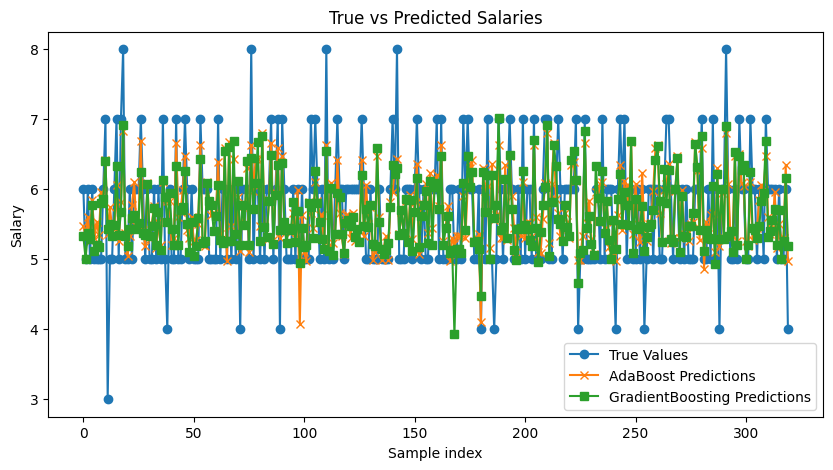

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_test)), y_test, label='True Values', marker='o')
plt.plot(np.arange(len(y_test)), y_pred_ada, label='AdaBoost Predictions', marker='x')
plt.plot(np.arange(len(y_test)), y_pred_gb, label='GradientBoosting Predictions', marker='s')
plt.legend()
plt.xlabel('Sample index')
plt.ylabel('Salary')
plt.title('True vs Predicted Salaries')
plt.show()

# XGBoost

In [37]:
# Các thư viện cần thiết
import xgboost as xgb

In [38]:
# Chuyển dữ liệu về dạng DMatrix (được tối ưu cho XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [39]:
# Định nghĩa các tham số cho mô hình XGBoost
params = {
    'objective': 'reg:squarederror',  # Loại bài toán là hồi quy (regression)
}

In [40]:
# Huấn luyện mô hình
num_round = 50  # Số lượng vòng lặp boosting (số cây quyết định sẽ được huấn luyện)
origin_model = xgb.train(params, dtrain, num_round)  # Huấn luyện mô hình XGBoost với các tham số đã định nghĩa

In [51]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Khai báo lưới tham số
param_grid = {
    'n_estimators': [200],
    'max_depth': [7],
    'learning_rate': [0.2],
    'subsample': [1.0]
}

# Hoàn thành RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Huấn luyện mô hình với tìm kiếm tham số
rs.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_xgb = rs.best_estimator_
xgb_pred = best_xgb.predict(X_test)

# In kết quả
print('Best XGB params:', rs.best_params_)
print('Tuned XGB → MSE:', mean_squared_error(y_test, xgb_pred))
print('Tuned XGB → R2:', r2_score(y_test, xgb_pred))


d:\python_envs\myenv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best XGB params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
Tuned XGB → MSE: 0.3443821966648102
Tuned XGB → R2: 0.47302353382110596


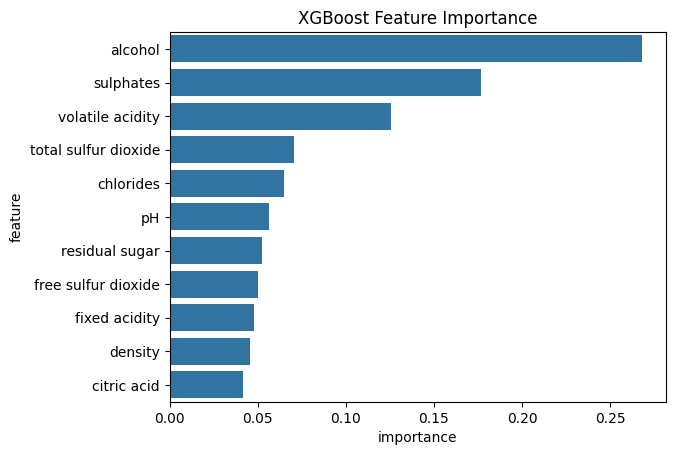

In [45]:
sns.barplot(x='importance', y='feature', data=pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_xgb.feature_importances_
}).sort_values('importance', ascending=False))
plt.title('XGBoost Feature Importance')
plt.show()

# Compare 4 models

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models regressor
models = {
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=50, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=50, random_state=42)
}

# TODO: Evaluate models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate R^2 and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results[name] = {'R^2': r2, 'MSE': mse}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                        R^2       MSE
Random Forest      0.531385  0.306243
XGBoost            0.465353  0.349395
AdaBoost           0.414434  0.382671
Gradient Boosting  0.435917  0.368632


In [ ]:
# Change model to classifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models classifier
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# TODO: Evaluate models
results = {}
for name, model in models.items():
    # Train and predict

    results[name] = {'R^2': r2, 'MSE': mse}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)